# Part 2: Effort Estimation

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Datasets

In [149]:
maxwell_data = pd.read_csv('Maxwell.csv')
heiat_data = pd.read_csv('heiat.csv')

In [150]:
maxwell_data

,id,size,effort,duration,syear,app,har,dba,Ifc,source,...,t08,t09,t10,t11,t12,t13,t14,t15,time,prod
0,1,562,1062,14,1991,InfServ,PC,Relatnl,GUI,Outsrced,...,4,3,3,2,4,3,5,3,7,0.529190
1,2,647,7871,16,1992,TransPro,Mainfrm,Relatnl,TextUI,Inhouse,...,5,4,5,4,4,4,4,5,8,0.082201
2,3,130,845,5,1993,TransPro,Mainfrm,Relatni,TextUI,Inhouse,...,2,4,3,4,4,4,4,4,9,0.153846
3,4,254,2330,8,1990,InfServ,Mainfrm,Relatnl,TextUI,Inhouse,...,3,4,5,4,3,2,3,3,6,0.109013
4,5,1056,21272,16,1986,CustServ,Mainfrm,Relatnl,TextUI,Inhouse,...,5,4,4,5,4,3,2,3,2,0.049643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,495,7105,20,1991,MIS,Network,Relatnl,TextUI,Outsrced,...,3,5,3,3,4,3,4,4,7,0.069669
59,60,622,6816,16,1990,CustServ,Multi,Relatnl,TextUI,Inhouse,...,4,4,3,4,3,2,4,3,6,0.091256
60,61,204,4620,12,1992,InfServ,Mainfrm,Relatnl,TextUI,Inhouse,...,5,5,5,5,4,3,2,3,8,0.044156
61,62,616,7451,15,1990,CustServ,Multi,Relatnl,TextUI,Inhouse,...,5,5,4,5,5,1,5,4,6,0.082674


In [151]:
heiat_data

,effort,size
0,24.5,148
1,14.2,157
2,16.2,157
3,16.6,178
4,15.4,178
5,14.8,178
6,20.6,179
7,16.9,186
8,17.6,187
9,16.1,192


### Regression model

#### a) Maxwell dataset

First, we will plot the data to see what we're working with. It will give us an insight about what to expect when choosing the degree for the regression model.

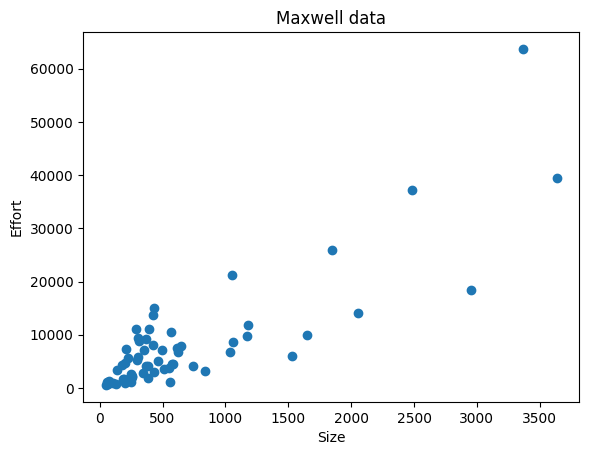

In [152]:
plt.scatter(maxwell_data['size'], maxwell_data['effort'])
plt.xlabel('Size')
plt.ylabel('Effort')
plt.title('Maxwell data')
plt.show()

Now we will split the dataset into train set and test set and train multiple regression models to see which is the optimal degree of regression model for our dataset. We want the smallest degree which will give us good results, because if the degree of the polynom is too high, our model will be over-learned, which means it will give great result on the training set, but bad results on the testing set, which is not what we want. We want the model to be able to predict well on never seen examples.

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [154]:
X_maxwell = maxwell_data['size'].values.reshape(-1, 1)
y_maxwell = maxwell_data['effort']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_maxwell, y_maxwell, test_size=0.2, random_state=42)

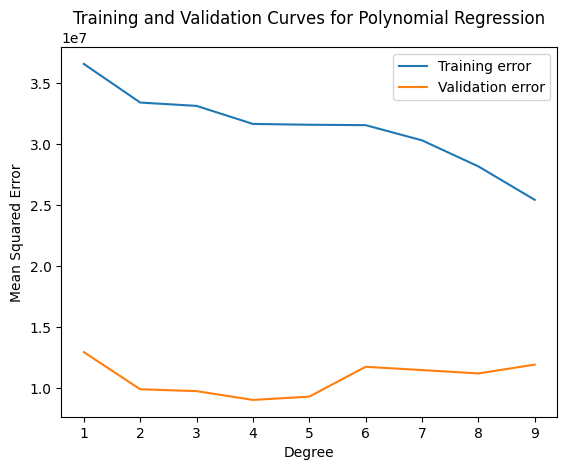

In [155]:
degrees = range(1, 10)  # degrees to try
train_errors = []
val_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train1)
    X_poly_val = poly.transform(X_test1)
    
    # train polynomial regression model
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train1)
    
    # predict on training and validation data
    y_train_pred = poly_reg.predict(X_poly_train)
    y_val_pred = poly_reg.predict(X_poly_val)
    
    # calculate Mean Squared Error for training and validation sets
    train_errors.append(mean_squared_error(y_train1, y_train_pred))
    val_errors.append(mean_squared_error(y_test1, y_val_pred))

# plot training and validation curves
plt.plot(degrees, train_errors, label='Training error')
plt.plot(degrees, val_errors, label='Validation error')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Curves for Polynomial Regression')
plt.legend()
plt.show()

As it is visible from the plot, regression is probably not the best way of prediction for this dataset. But still, we will calculate the mean squared error and r-squared to see how far off we are. Let's try fitting the fourth degree curve to our data, and represent it all on one plot.

Mean Squared Error: 9060639.12167244
R-squared: 0.45100441946707837


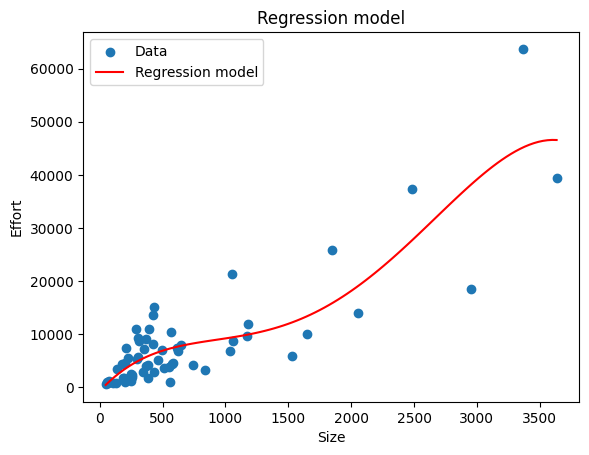

In [158]:
degree = 4

poly = PolynomialFeatures(degree)

X_poly_train = poly.fit_transform(X_train1)
X_poly_test = poly.transform(X_test1)

# training
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train1)

# prediction
y_pred = poly_reg.predict(X_poly_test)

# evaluation
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# plot
plt.scatter(X_maxwell, y_maxwell, label='Data')
x_range = np.linspace(min(X_maxwell), max(X_maxwell), 100).reshape(-1, 1)
x_poly_range = poly.transform(x_range)
y_poly_range = poly_reg.predict(x_poly_range)
plt.plot(x_range, y_poly_range, color='red', label='Regression model')

plt.xlabel('Size')
plt.ylabel('Effort')
plt.title('Regression model')
plt.legend()
plt.show()


Both mean squared error and R-squared are far from ideal, we believe it is because the oscilations with more advanced projects with much larger size. This was expected because the bigger the project is, it is harder to generalize the effort needed to finish it, because it will depend on many more things as opose to the smaller projects. We will try some other prediction models in the next chapter to see if their prediction will be better.

#### b) Heiat dataset

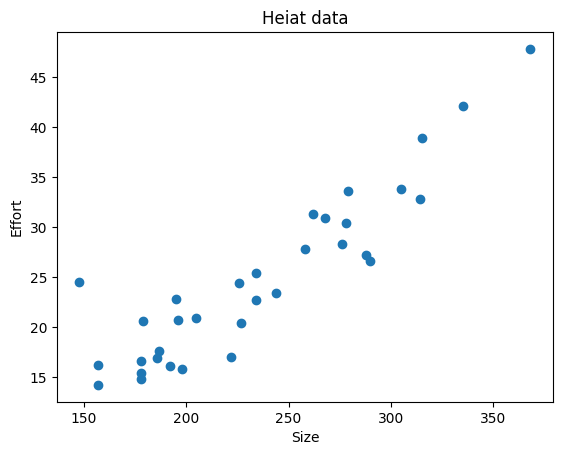

In [130]:
plt.scatter(heiat_data[' size'], heiat_data['effort'])
plt.xlabel('Size')
plt.ylabel('Effort')
plt.title('Heiat data')
plt.show()

The process of choosing the degree is the same as for the previous dataset.

In [131]:
X_heiat = heiat_data[' size'].values.reshape(-1, 1)
y_heiat = heiat_data['effort']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_heiat, y_heiat, test_size=0.2, random_state=42)

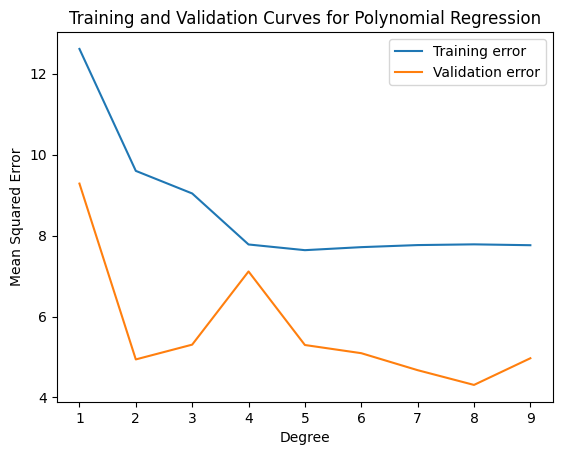

In [132]:
degrees = range(1, 10)  # degrees to try
train_errors = []
val_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train2)
    X_poly_val = poly.transform(X_test2)
    
    # train polynomial regression model
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train2)
    
    # predict on training and validation data
    y_train_pred = poly_reg.predict(X_poly_train)
    y_val_pred = poly_reg.predict(X_poly_val)
    
    # calculate Mean Squared Error for training and validation sets
    train_errors.append(mean_squared_error(y_train2, y_train_pred))
    val_errors.append(mean_squared_error(y_test2, y_val_pred))

# plot training and validation curves
plt.plot(degrees, train_errors, label='Training error')
plt.plot(degrees, val_errors, label='Validation error')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Curves for Polynomial Regression')
plt.legend()
plt.show()

Now this one is a little bit tricky, degree = 8 has the smallest validation error, but it is pretty close to degree = 2, so we will choose that one since the dataset is pretty small and polynome of 8th degree could easily give as an over-learned model.

Mean Squared Error: 4.940122807171486
R-squared: 0.9212475868150399


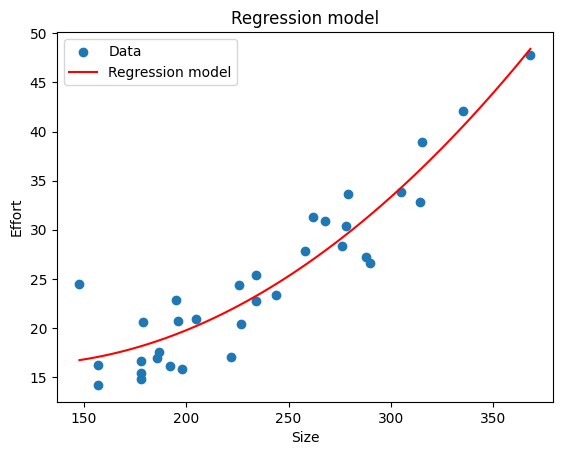

In [133]:
degree = 2

poly = PolynomialFeatures(degree)

X_poly_train = poly.fit_transform(X_train2)
X_poly_test = poly.transform(X_test2)

# training
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train2)

# prediction
y_pred2 = poly_reg.predict(X_poly_test)

# evaluation
mse = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# plot
plt.scatter(X_heiat, y_heiat, label='Data')
x_range = np.linspace(min(X_heiat), max(X_heiat), 100).reshape(-1, 1)
x_poly_range = poly.transform(x_range)
y_poly_range = poly_reg.predict(x_poly_range)
plt.plot(x_range, y_poly_range, color='red', label='Regression model')

plt.xlabel('Size')
plt.ylabel('Effort')
plt.title('Regression model')
plt.legend()
plt.show()


Both mean squared error and r-squared indicate that the regression model of second degree is explaining our data really well.

### K-nearest Neighbours Regression

This is a method that could potentially work since our datasets are quite small and (in case of Maxwell data), not following the polynome line that well. Let's see if it works better than regression.

#### a) Maxwell dataset

First, we need to find the optimal k hyperparameter to see how many nearest neighbors to consider when making predictions for a new data point.

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# k values to try
k_values = list(range(1, 21))

param_grid = {'n_neighbors': k_values}

knn_regressor = KNeighborsRegressor()

grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train1, y_train1)

best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

Best k: 4


Now we will see how well does our model work with the optimal k.

In [161]:
k = 4 
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# training
knn_regressor.fit(X_train1, y_train1)

# prediction
y_pred1 = knn_regressor.predict(X_test1)

# evaluation
mse = mean_squared_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5768733.923076923
R-squared: 0.6504651176908371


As we can see, KNN is performing somewhat better, but still not good enough. We still believe it is because the oscillations with more advanced projects with much larger size.

#### b) Heiat dataset

Finding the optimal k.

In [164]:
k_values = list(range(1, 21))

param_grid = {'n_neighbors': k_values}

knn_regressor = KNeighborsRegressor()

grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train2, y_train2)

best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

Best k: 4


In [165]:
k = 4 
knn_regressor = KNeighborsRegressor(n_neighbors=k)

knn_regressor.fit(X_train2, y_train2)

y_pred2 = knn_regressor.predict(X_test2)

mse = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 7.252589285714291
R-squared: 0.8843836620295663


For the Heiat dataset, we can see that regression is doing a better job in effort estimation, but KNN is also not bad.